

# Project: Investigation of TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset that will be analyzed is from The Movie Database (TMDb), which is a popular database that contains information on a plethora of different movies. This data will be be examined to answer certain interesting questions one might pose about famous movies over time. There are around 10,000 different movies in this dataset. There are 21 columns that include the movie title, cast, popularity, director, budget and other information for each movie.

>**Question 1: Which genres of movies are the most popular overall?**

>**Question 2: Which genres account for the most movies?**

>**Question 3: Which movie was the most profitable each year?**

>**Question 4: What is the trend of the total profit of the movie industry over time?**

>**Question 5: Which actors have acted in the most movies?**


In [1]:
# Import all necessary packages
import numpy as np
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> It is imperative to first be very familiar with the data provided and examine it from different angles. It also is important to clean the data to assure that it is ready for analysis

### General Properties

In [2]:
# Load the data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> The frame above displays the first 5 rows of the dataset.

In [3]:
#Create function that clearly states the number of rows and columns in the dataframe
def shape():
    rows, columns = df.shape
    return 'There are {} rows and {} columns in this dataset'.format(rows,columns)
shape()

'There are 10866 rows and 21 columns in this dataset'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Check for duplicate rows
df.duplicated().sum()

1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Observations

>    There are several important elements to consider after examining this data set. 
Firstly, any duplicate rows must be omitted from the data as they will alter the accuracy of certain data models. There appears to be one duplicated row that is currently in the dataset. Next, from the table above, it is apparent that there are rows where the budget and revenue columns hold a value of 0. These rows are not useful in the analysis of this dataset and must be deleted.

>    The specific columns that will be potentially helpful in answering the intial questions include: popularity, original_title, cast, genres, release_year, budget_adj, and revenue_adj. Out of these columns, the cast and genre columns include some null rows. For the sake of the analysis, these rows should be deleted. This being said, one can note that the budget and revenue columns contain rows that hold a value of 0, which should be treated as null rows as well. 

> Finally, any columns that are not necessary for the analysis will be deleted. It must be noted that the budget_adj and revenue_adj columns represent the budget and revenue of the movie in terms of 2010 dollars respectively to account for inflation over time. Inflation will be taken into account when determining movie profits, therefore the original budget and revenue cells will be deleted.


#### 1. Delete any duplicate rows


In [31]:
# Determine the number of duplicate rows
df.duplicated().sum()

0

In [32]:
# Delete the duplicate row
df.drop_duplicates(inplace=True)
shape()

'There are 3850 rows and 8 columns in this dataset'

#### 2. Remove the 0s from budget and revenue columns

In [9]:
# Replace any 0s in the budget and revenue columns with null values
# Use np.NAN from numpy to import null values
col_list = ['budget','revenue','budget_adj','revenue_adj']
df[col_list] = df[col_list].replace(0,np.NAN)

# drop the resulting null rows from these columns
df.dropna(subset = col_list,inplace=True)
shape()

'There are 3854 rows and 21 columns in this dataset'

#### 3. Remove null rows from relevant columns

In [10]:
# Check if the cast and genres columns still have null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 21 columns):
id                      3854 non-null int64
imdb_id                 3854 non-null object
popularity              3854 non-null float64
budget                  3854 non-null float64
revenue                 3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
homepage                1426 non-null object
director                3853 non-null object
tagline                 3574 non-null object
keywords                3716 non-null object
overview                3854 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null object
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null

 The series above shows that genres column does not have any null rows anymore, however the cast column still does.

In [11]:
# drop the null rows from the cast column
df.dropna(subset = ['cast'], inplace = True)
shape()

'There are 3850 rows and 21 columns in this dataset'

#### 4. Delete unused columns

In [12]:
unused_col = ['id','imdb_id','budget','revenue','homepage','director','tagline','keywords','overview',
              'runtime','production_companies','release_date','vote_count','vote_average']

# Drop these columns from the dataset
df.drop(columns = unused_col,inplace=True)
df.head()

,popularity,original_title,cast,genres,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


>These are the first 5 rows of the resulting dataframe.

<a id='eda'></a>
## Exploratory Data Analysis

> Now that the data has been cleaned, analysis of this data pertaining to the intial research question can now be carried out. These questions can be answered through thorough analysis and visualizations of the resulting data. 

>Reminder: All analysis is performed on the resulting cleaned dataset.

### Research Question 1: Which genres of movies are the most popular overall?

It is noticeable that each row in the genres column contains multiple different genres separated by pipe (|) characters. To answer this question, all unique genres that appear in the dataset must be determined. In the code below, a function is created to separate each individual element for a certain column and create a list of all the unique elements that appear.

In [13]:
def unique_elements(column):
    # Create a series for the given column
    # seperate individual elements
    elements = column.str.split("|")
    
    # Create a list of all unique elements
    unique_list = []
    
    for row_list in elements.iteritems():
        for item in row_list[1]:
            if item not in unique_list:
                unique_list.append(item)
    return unique_list

unique_elements(df['genres'])

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'Foreign',
 'TV Movie']


> Above is a list of all the various movie genres that can be found in this dataset. Using the values in the popularity column of the dataframe, an alternate dataframe can now be made that diplays the total popularity recorded for each individual genre.


In [14]:
genre_list = unique_elements(df['genres'])

#Use a dictionary to store the genres with their corresponding total popularity values
genre_popularity = {}

#loop through the unique list of genres
for genre in genre_list:
   
    #loop through the rows of the dataframe
    for index,row in df.iterrows():
    
        #sum the popularity for each genre and add to the dict
        if genre in row['genres']:
            genre_popularity[genre] = genre_popularity.get(genre,0) + row['popularity']

#Use pandas to create a dataframe from the dictionary
df_genre_popularity = pd.DataFrame([genre_popularity])
df_genre_popularity

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1700.320953,1398.902084,343.835008,1374.731569,731.698494,9.802957,1758.115388,620.093449,694.708555,2.334908,125.216909,395.404211,121.902162,393.058731,636.911228,972.239433,0.273628,1515.581815,148.289378,58.980777



> The dataframe above has columns representing each genre and row values that represent their total popularity. Graphing the data from this dataframe will provide clearer insight on which genres turned out to be the most popular.


Text(0,0.5,'Movie Genres')

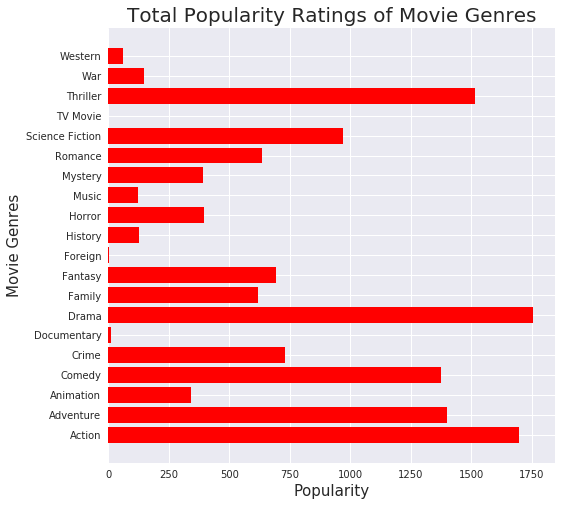

In [15]:
#plot and display values from the dataframe above
genres = list(df_genre_popularity.columns)
popularity = list(df_genre_popularity.values.tolist()[0])
sns.set()
plt.subplots(figsize=(8,8))
plt.barh(genres,popularity,color='red')
plt.title('Total Popularity Ratings of Movie Genres',fontsize=20)
plt.xlabel('Popularity',fontsize=15)
plt.ylabel('Movie Genres',fontsize=15)


> From the graph above, it is apparent that drama, action, and thriller movies are the most popular with drama being the absolute most popular genre. Documentaries, foreign, and TV movies on the other hand, appear to be the least popular movies with TV movies being the absolute least popular.

### Research Question 2: Which genres account for the most movies?

Although the popularity of each movie genre has been determined, one must realize that different genres appear a different number of times in this dataset. Therefore, it is important to determine and consider the number of movies that each genre accounts for.

Below, a dataframe is created that displays the number of times each genre appears in the dataset.


In [16]:
#Create a function that counts the frequency individual elements in a column
def element_count(column):
    
    #Concatenate the strings of all column rows separated by the pipe character
    column_data = column.str.cat(sep="|")
    
    #split the data on the pipe character
    data_split = pd.Series(column_data.split("|"))
    
    #Count the frequency of each individual element
    count = data_split.value_counts(ascending=False)
    
    return count

#Run the function on the genres column
genre_count = element_count(df['genres'])

#Use pandas to create a dataframe from this series
df_genre_count = pd.DataFrame([genre_count])
df_genre_count

,Drama,Comedy,Thriller,Action,Adventure,Romance,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,Music,History,War,Western,Documentary,Foreign,TV Movie
0,1754,1358,1203,1085,749,667,651,519,463,425,396,344,201,134,129,119,52,31,13,1



> The dataset contains columns for each movie genre with row values that represent the number of movies these genres account for. To facilitate the visualization of this data, all genres with count values under 100 will be combined into one column labeled "Other".


In [17]:
#Determine which columns has a value less than 100
num_range = range(0,100)
df_genre_count.isin(num_range)

,Drama,Comedy,Thriller,Action,Adventure,Romance,Crime,Science Fiction,Horror,Family,Fantasy,Mystery,Animation,Music,History,War,Western,Documentary,Foreign,TV Movie
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True


> The dataframe above contains boolean values for each column that makes it easy to indicate whether a genre has a count of under 100 or not.

In [18]:
#Add columns with small values into column labeld "Other"
df_genre_count['Other'] = df_genre_count['Documentary'] + df_genre_count['Foreign'] + df_genre_count['TV Movie'] + df_genre_count['Western']

#Delete the previous columns with smaller values
delete_col = ['Documentary','Foreign','TV Movie','Western']
df_genre_count.drop(columns=delete_col,inplace=True)

Text(0.5,1,'Amount of Movies per Genre')

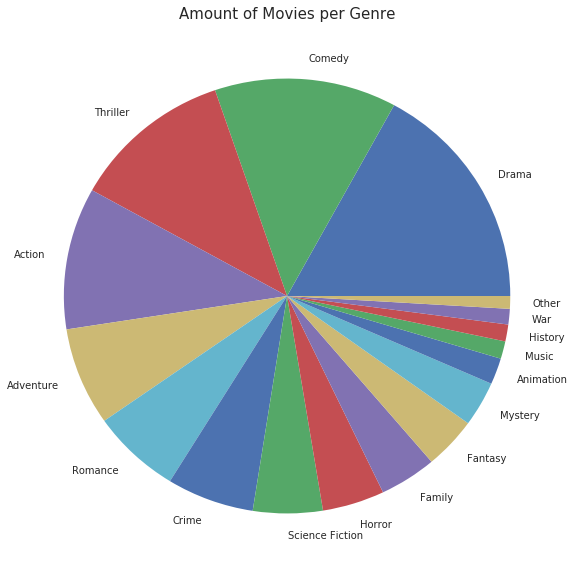

In [19]:
#Plot and display the resulting values
genres = list(df_genre_count.columns)
count = df_genre_count.values.tolist()[0]
plt.figure(figsize=(10,10))
plt.pie(count,labels = genres)
plt.title("Amount of Movies per Genre",fontsize=15)


> The pie chart above displays how frequently each genre appears in the dataset. As expected, the drama, action, and thriller movies appear in thre dataset the most often. It is interesting, however, that comedy movies are one of the most frequent movies that appear in the dataset as well.

### Research Question 3: Which movie was the most profitable each year?

The budget and resulting revenue for each movie is available in the dataframe. These two columns will be used to determine and analyze the profit made for each movie. This information can then be used to create an alternate dataframe that clearly displays which movie made the most profit each year along with the profit they made.

In [20]:
#Create a column from the difference between the budget and revenue
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head()

,popularity,original_title,cast,genres,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09,1.210949e+09


> Now that the profit column has been successfully added to the data frame, this information will be used to determine which movies made the most proift in their respective release year.

In [21]:
#Create a list of the different release years in the dataset
years = list(df['release_year'].unique())

#Create an empty dataframe for the desired columns
df_max_profit = pd.DataFrame({'release_year' : pd.Series([],dtype='int'),
                         'original_title': pd.Series([],dtype='str'),
                         'max_profit': pd.Series([],dtype='float')})

#loop through each unique year in the dataframe
for year in years:
    df_year = df.query('release_year == @year')
    
    #df_year is a subset of df so its index must be updated from its original index
    df_year = df_year.reset_index(drop=True)
    
    #find the index of the maximum profit value
    idx = df_year['profit'].idxmax()
    
    #Create a dictionary to store these values
    profit_dict = {'release_year': df_year['release_year'].iloc[idx],
                   'original_title':df_year['original_title'].iloc[idx],
                  'max_profit': df_year['profit'].iloc[idx]}
    
    #Add the data in the dictionary to the dataframe
    df_max_profit = df_max_profit.append(profit_dict,ignore_index = True)

#Check the resulting dataframe    
df_max_profit.head()

,release_year,original_title,max_profit
0,2015,Star Wars: The Force Awakens,1.718723e+09
1,2014,The Hobbit: The Battle of the Five Armies,6.494795e+08
2,1977,Star Wars,2.750137e+09
3,2009,Avatar,2.586237e+09
4,2010,Toy Story 3,8.631719e+08


> The dataframe above contains correct desired columns, however the release years are displayed out of order. For a better representation of the data, the years must be ordered correctly.

In [22]:
#Sort the dataframe rows by the release year
df_max_profit.sort_values(by = ['release_year'],inplace = True)

#Reset the altered index of the dataframe
df_max_profit = df_max_profit.reset_index(drop=True)
df_max_profit

,release_year,original_title,max_profit
0,1960,Spartacus,3.539024e+08
1,1961,One Hundred and One Dalmatians,1.545635e+09
2,1962,Dr. No,4.216943e+08
3,1963,From Russia With Love,5.439729e+08
4,1964,Goldfinger,8.534745e+08
5,1965,The Sound of Music,1.072786e+09
6,1966,Who's Afraid of Virginia Woolf?,1.762585e+08
7,1967,The Jungle Book,1.319404e+09
8,1968,2001: A Space Odyssey,2.803190e+08
9,1969,Butch Cassidy and the Sundance Kid,5.724855e+08


> The dataframe above is now properly ordered and one can clearly see which movie made the most profit each year from 1960 to 2015. The movie that made the absolute most profit can be found using the code below.

In [30]:
idx = df_max_profit['max_profit'].idxmax()
df_max_profit.iloc[idx]

release_year             1977
original_title      Star Wars
max_profit        2.75014e+09
Name: 17, dtype: object

>According to the dataframe, Star Wars is the absolute most profitable movie from 1960 to 2015

### Research Question 4: What is the trend of the total profit of the movie industry over time?

The new profit column in the dataframe can be used to determine how the total profit of all movies each year has changed over time.

Text(0,0.5,'Profit')

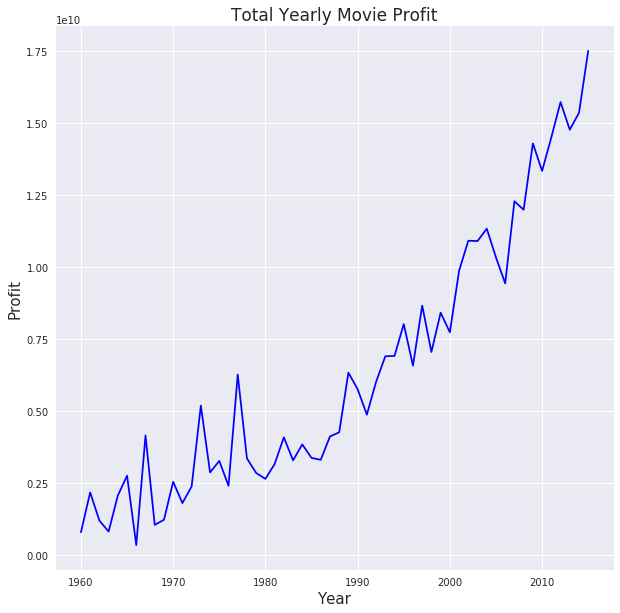

In [24]:
#Determine the total movie profits for each year
profit_total_series = df.groupby('release_year').profit.sum()
years = list(profit_total_series.index)
yearly_total_profit = list(profit_total_series.values)

#Plot and display the data
plt.figure(figsize=(10,10))
plt.plot(years,yearly_total_profit,color='blue')
plt.title('Total Yearly Movie Profit',fontsize=17)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Profit',fontsize=15)

> The graph above depicts that overall, the total profit generated by the movie industry has increased drastically over time and in recent years even while considering inflation.

### Research Question 5: Which actors appear in the most movies?

The functions that were created and used for the analysis of the genres column will be proven useful for the cast column as well to determine the individual actors in the dataset and how many movies they have acted in. 

In [25]:
num_actors = len(unique_elements(df['cast']))
print("There are {} different actors in this dataset".format(num_actors))

There are 6839 different actors in this dataset


> The use of the unique_elements() function on the cast column shows that there is a large amount of different actors in this dataset, as expected. The cast_count() function will be used to determine the top 20 actors who have acted in the most movies and how many movies they have acted in.

Text(0,0.5,'Actors')

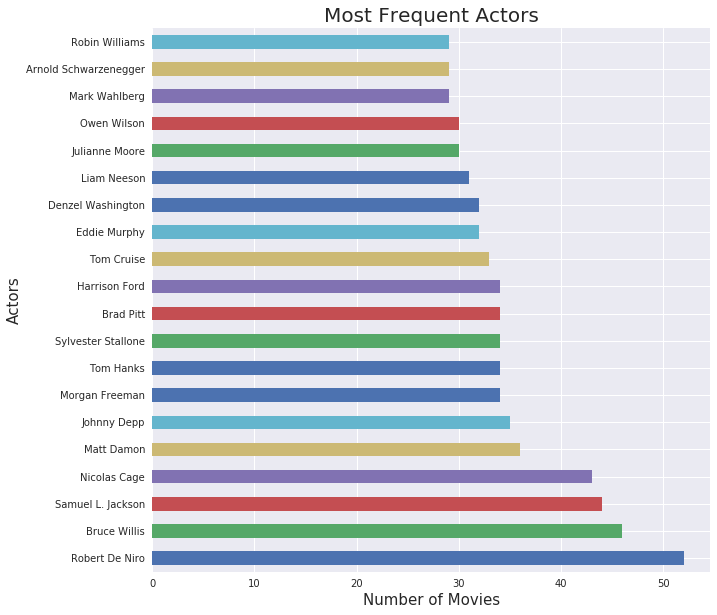

In [26]:
actor_movie_count = element_count(df['cast'])

actor_movie_count.iloc[:20].plot.barh(figsize = (10,10))
plt.title("Most Frequent Actors",fontsize =20)
plt.xlabel("Number of Movies",fontsize=15)
plt.ylabel("Actors",fontsize=15)

> The graph above displays the top 20 most frequent actors. It very interesting to see that Robert De Niro has acted in the most movies by a considerable amount.

<a id='conclusions'></a>
## Conclusions

>All posed research questions were able to be answered through the analysis. There were many interesting facts that were pulled out from the data. It was found that drama, action and thriller movies are the most popular movie genres. Drama movies appeared to be the most popular of them all. However, a factor that affects the total popularity ratings of the movie genres is the number of movies made in that genre. When the number of movies per genre was determined, it was interesting to discover that comedy movies are the second most frequent movies with drama movies being the most frequent. Although comedy movies are very popular, they are still not as popular as action and thriller movies.

>The profit each movie made was also looked into and analyzed. The most profitable movie from each year was determined while also considering inflation. From the year 1960 to the year 2015,the 1977 move Star Wars is the absolute most profitable movie of all. The total profit genenerated from the movie industry has also appeared to drastically increase over time. There is a particularly steep increase in total profit over recent years.

>The analyzed dataset contained 6,839 different actors. The data revealed that of these 6,839 different actors, Robert De Niro has made the most movies. In fact, he is the only actor to have acted in over 50 movies.

>**Limitations**: There are many things that must be considered when examining the results of the analysis. One must remember that all of the analysis was performed on the cleaned dataset and that the results are there to portray facts based on this dataset. Any correlation between variables in this analysis does not necessarily mean that one is the cause of the characterstics of another. For example, drama movies proved to be the most popular, however this does not mean that all or most high budget drama movies will indivually be very popular or make a very profit. It is also important to note that there is not a currency unit in the budget or revenue columns. Even though it was possibly to consider inflation when dealing with these variables to determine profit, different movies may have their budgets and revenues in different currencies.

